In [7]:
from fastai.vision import *
from fastai.metrics import accuracy

# Setup

In [8]:
path = '/Users/haiho/Internship/computervision/data/derived/Cohn-Kanade/CKplus/02_processed'
path_train = '/Users/haiho/Internship/computervision/data/derived/Cohn-Kanade/CKplus/02_processed/train'
path_valid = '/Users/haiho/Internship/computervision/data/derived/Cohn-Kanade/CKplus/02_processed/validation'

# Load data

In [3]:
bs = 8
data = ImageDataBunch.from_folder(path, train='train', valid='validation', ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)



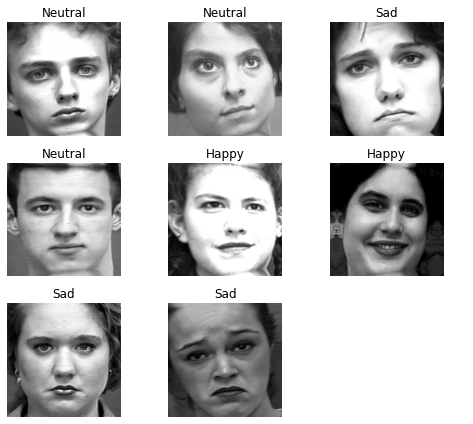

In [4]:
data.show_batch(rows=4, figsize=(7,6))

# Train model

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/haiho/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.622232,0.400845,0.854167,50:12
1,0.453571,0.183261,0.932292,59:08
2,0.312252,0.149606,0.951637,58:20
3,0.282416,0.136902,0.950893,54:54


In [18]:
learn.save('stage-1')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

True

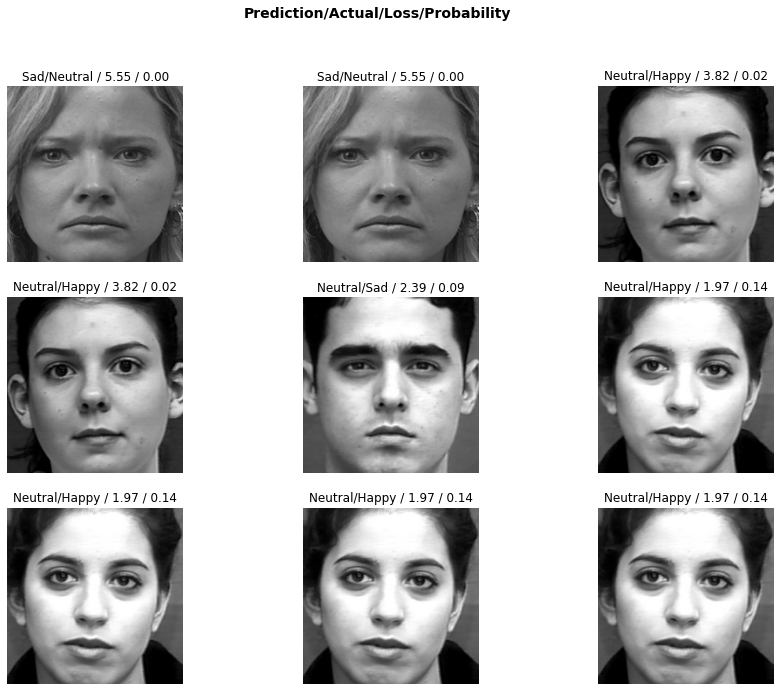

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

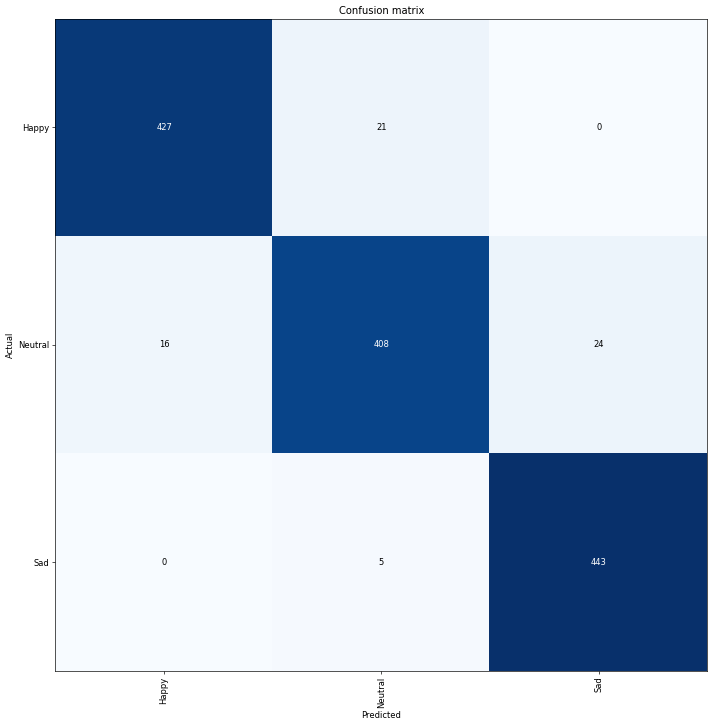

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


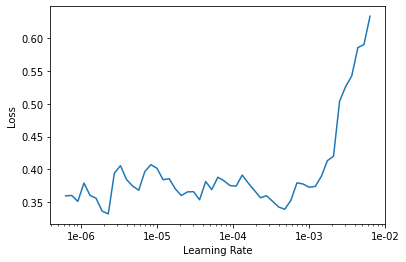

In [17]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))